<a href="https://colab.research.google.com/github/JonathanJuradoS/Clustering_GMM/blob/main/Ejemplo_Practico_GMM_vs_AHC_Segmentacion_Multicanal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Clustering Multicanal de Clientes: GMM vs Agglomerative

**Objetivo:** Comparar dos algoritmos de clustering no supervisado sobre un dataset realista usando análisis de componentes principales (PCA) y visualización 2D/3D.

## 📦 Paso 1: Cargar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from mpl_toolkits.mplot3d import Axes3D

## 📁 Paso 2: Cargar y explorar el dataset

In [2]:
df = pd.read_csv("/content/Ejemplo_Practico_segmentacion_clientes_multicanal.csv")
df.head()

,visitas_tienda,compras_online,tiempo_web_min,gasto_mensual
0,5,5,19.714471,242.426792
1,4,3,14.891280,228.876579
2,4,3,14.909933,206.902523
3,4,5,7.158368,275.789691
4,2,3,11.272616,147.708117


## ⚙️ Paso 3: Preprocesamiento de datos
- Escalar variables para igualdad de peso
- Aplicar PCA a 2 y 3 componentes para visualización

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

PCA (Análisis de Componentes Principales) reduce la dimensionalidad del conjunto de datos mientras conserva la máxima varianza posible.
Este proceso transforma el espacio original en un nuevo espacio de menor dimensión, facilitando la visualización y el análisis.

Se generan dos nuevas versiones del dataset:

X_pca_2d: Representación para visualización en 2D.

X_pca_3d: Representación para visualización en 3D.

Esta técnica permite representar datos complejos de forma más comprensible sin perder demasiada información relevante.

➡️ Estos datos transformados (X_pca_2d y X_pca_3d) se utilizarán posteriormente para visualizar gráficamente los resultados de clustering de GMM y Agglomerative.

## 🤖 Paso 4: Clustering con GMM

In [4]:
gmm = GaussianMixture(n_components=4, random_state=0)
labels_gmm = gmm.fit_predict(X_scaled)

## 🔗 Paso 5: Clustering Jerárquico (Agglomerative)

In [5]:
agg = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')
labels_agg = agg.fit_predict(X_scaled)

## 📊 Paso 6: Visualización en 2D PCA

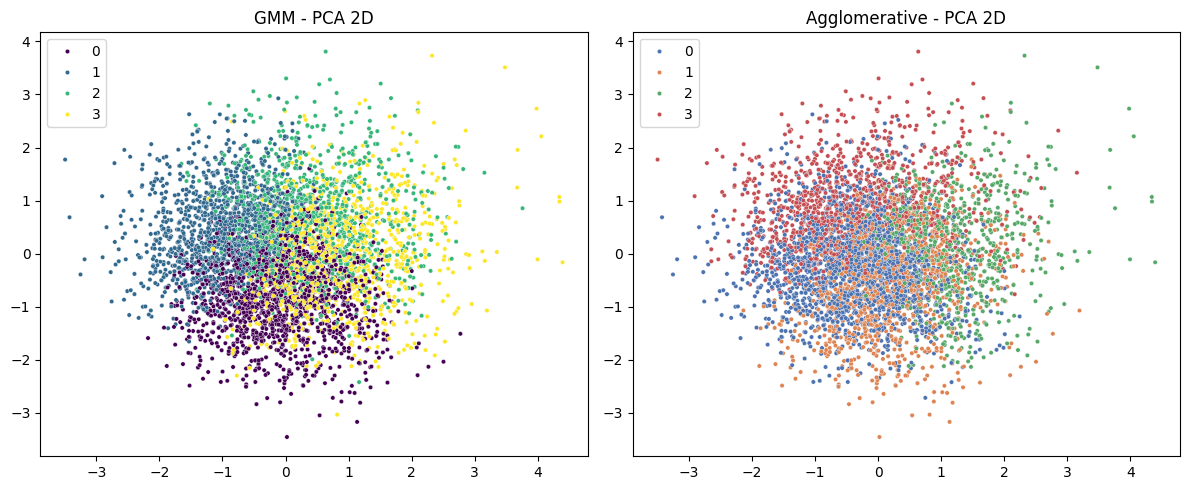

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=labels_gmm, palette='viridis', s=10)
plt.title("GMM - PCA 2D")

plt.subplot(1,2,2)
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=labels_agg, palette='deep', s=10)
plt.title("Agglomerative - PCA 2D")
plt.tight_layout()
plt.show()

## 🧭 Paso 7: Visualización en 3D PCA

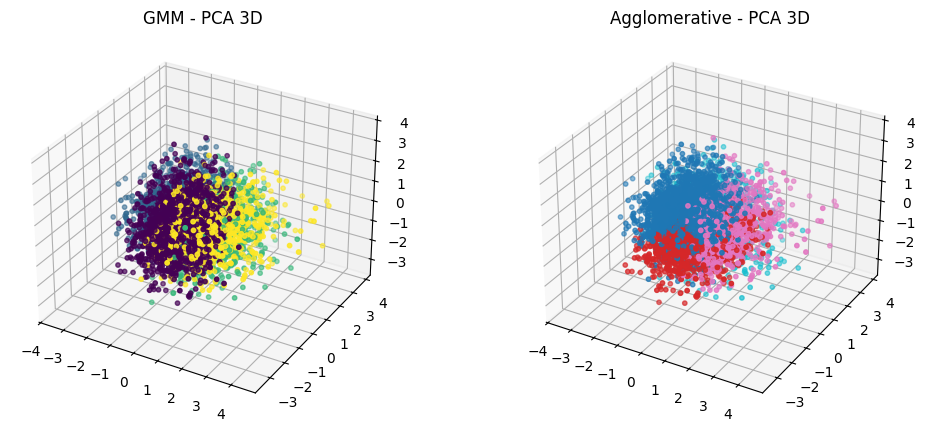

In [7]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2], c=labels_gmm, cmap='viridis', s=10)
ax.set_title("GMM - PCA 3D")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2], c=labels_agg, cmap='tab10', s=10)
ax2.set_title("Agglomerative - PCA 3D")
plt.show()

## 📐 Paso 8: Evaluación de Modelos
**Métricas:**
- *Silhouette Score*: mide qué tan similar es un punto a su propio clúster comparado con otros clústeres (mayor es mejor).
- *Davies-Bouldin Score*: evalúa dispersión intra-clúster y separación entre clústeres (menor es mejor).

In [8]:
sil_gmm = silhouette_score(X_scaled, labels_gmm)
db_gmm = davies_bouldin_score(X_scaled, labels_gmm)

sil_agg = silhouette_score(X_scaled, labels_agg)
db_agg = davies_bouldin_score(X_scaled, labels_agg)

print(f"GMM - Silhouette: {sil_gmm:.4f} | Davies-Bouldin: {db_gmm:.4f}")
print(f"Agglomerative - Silhouette: {sil_agg:.4f} | Davies-Bouldin: {db_agg:.4f}")

GMM - Silhouette: 0.1669 | Davies-Bouldin: 1.5618
Agglomerative - Silhouette: 0.1182 | Davies-Bouldin: 1.7944


## ✅ Conclusiones Finales del Análisis Comparativo

### 📌 Resultados Obtenidos
- **GMM**
  - *Silhouette Score:* 0.1669
  - *Davies-Bouldin Score:* 1.5618

- **Agglomerative Clustering**
  - *Silhouette Score:* 0.1182
  - *Davies-Bouldin Score:* 1.7944

### 📊 Interpretación de Métricas

- **Silhouette Score** mide la coherencia interna de los clústeres. Valores más cercanos a 1 indican mejor separación.  
  → *GMM presenta una mayor cohesión y separación entre clústeres* que Agglomerative.

- **Davies-Bouldin Score** evalúa la relación entre dispersión intra-clúster y separación inter-clúster. Un valor más bajo indica clústeres más compactos y bien separados.  
  → *GMM también supera a Agglomerative*, con un valor de 1.5618 frente a 1.7944.

### 🧠 Conclusión General

- **GMM ha mostrado un mejor rendimiento general** frente al clustering jerárquico para este conjunto de datos, tanto en separación como en cohesión.
- Aunque Agglomerative Clustering es útil para explorar jerarquías y no requiere definir K inicialmente, **en este caso su rendimiento fue inferior**.
- Se recomienda **GMM cuando se desea una segmentación más flexible**, especialmente con datos que podrían superponerse entre categorías.

---


## ✅ Conclusiones Finales
- **GMM** permite modelar superposición entre clústeres y muestra buena separación con Silhouette alto.
- **Agglomerative** ofrece visión jerárquica, útil para exploración, con menor Davies-Bouldin (mayor cohesión).
- Ambos modelos revelan patrones claros de clientes híbridos, digitales o presenciales.
- La elección depende del contexto: GMM para soft clustering, Agglomerative para estructura jerárquica.